In [1]:
import pandas as pd
import numpy as np

print("NOTEBOOK WORKING")


NOTEBOOK WORKING


In [2]:
import os

os.listdir("..")


['DATA', 'NOTEBOOK']

In [6]:
df = pd.read_csv("../DATA/BMW.csv")
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [7]:
df.shape


(10781, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


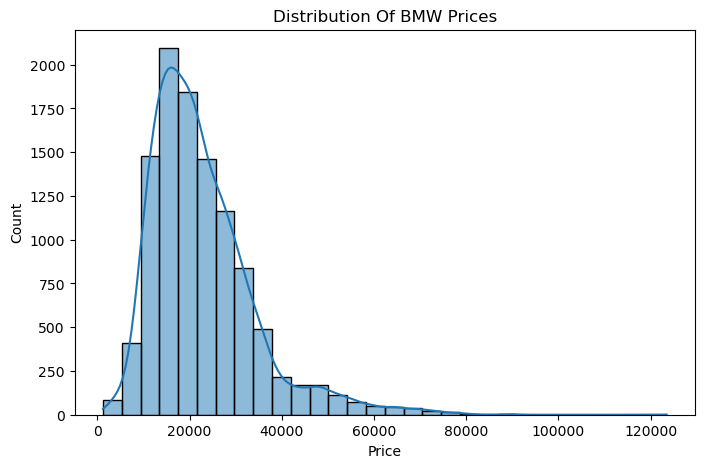

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution Of BMW Prices')
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


# Insight(Distribution Of BMW Prices):

Most BMW cars are priced in the lower to mid-price range, with fewer cars at very high prices.


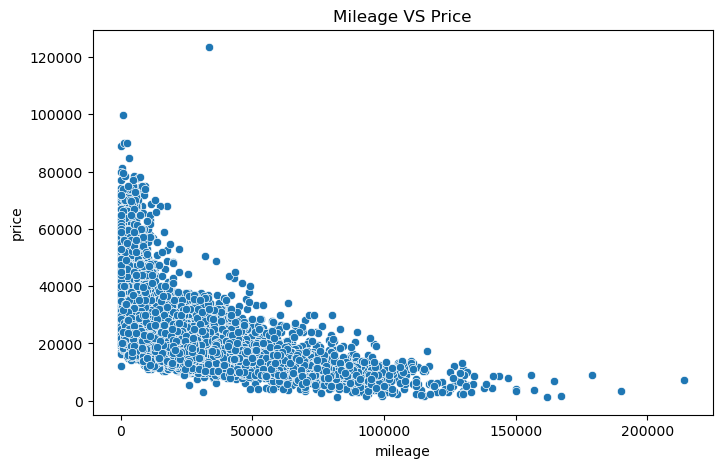

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage', y='price', data=df) 
plt.title('Mileage VS Price')
plt.show()

# Insight(Mileage VS Price):

Cars with higher mileage tend to have lower resale prices.


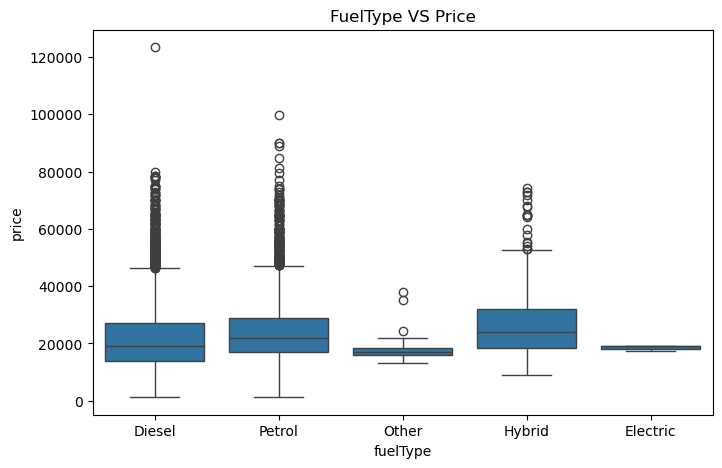

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='fuelType' , y='price' , data=df)
plt.title('FuelType VS Price')
plt.show()           


# Insight (Fuel Type vs Price):
Hybrid BMW cars generally have the highest median prices, indicating a premium for newer technology. 
Petrol and Diesel cars have similar price ranges, though Petrol cars show slightly higher upper outliers.
Electric BMW cars appear limited in number and are priced in a relatively narrow range.


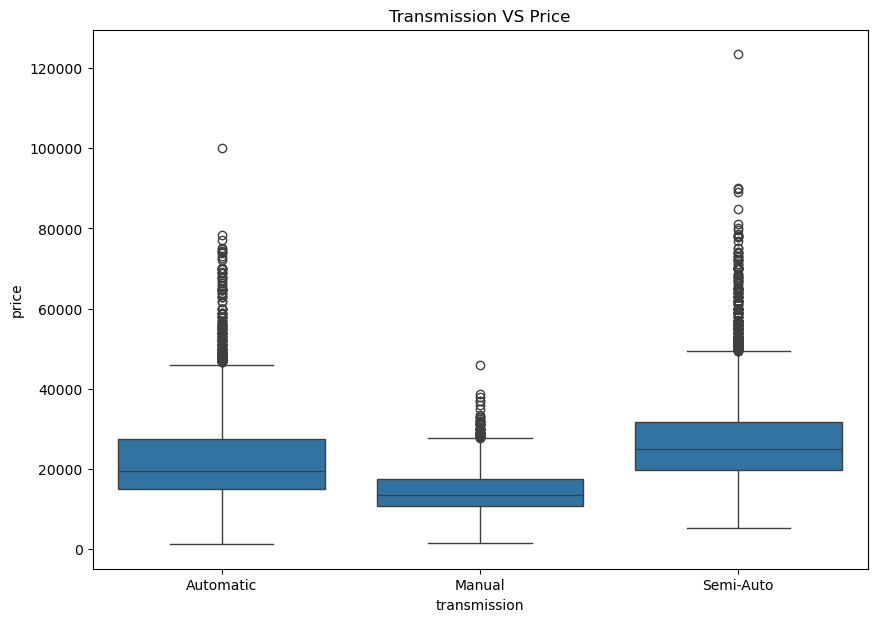

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Transmission VS Price')
plt.show()

# Insight(Transmission VS Price):
Semi-automatic BMW cars have the highest median prices, followed by automatic cars, while manual transmission cars are generally the cheapest. 
The large number of high-price outliers in automatic and semi-automatic categories indicates that most premium and luxury BMW models use these transmission types.


# Machine Learning: Price Prediction


In [21]:
X = df.drop('price', axis=1)
y = df['price']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [24]:
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numeric_cols


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),('num', 'passthrough', numeric_cols)])


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr_model = Pipeline(steps=[('preprocessor', preprocessor),('model', LinearRegression())])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression R²: 0.8461816491075118
Linear Regression MAE: 3166.3395336381013


# Model Comparison:
Random Forest achieved higher R² score and lower MAE compared to Linear Regression, indicating better prediction performance.
